In [2]:
import casadi as cs
import numpy as np
import matplotlib.pyplot as plt

In [45]:
opti = cs.Opti()

t = opti.variable()
a0 = opti.variable()
a1 = opti.variable()
a2 = opti.variable()


In [46]:
def f(t): return a0+(a1*t)+(a2*t**2)

opti.minimize( f(t) )

opti.subject_to( a0 >= 5 )
opti.subject_to( a1 <= 2.2 )
opti.subject_to( a1 >= 0 )
opti.subject_to( a2 >= 0.4 )
opti.subject_to( a2 <= 1 )

opti.solver('ipopt')
sol = opti.solve()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        5
        inequality constraints with only lower bounds:        3
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [47]:
# found coefficients

print(f'Coefficients \n a0 = {sol.value(a0)},\n a1 = {sol.value(a1)},\n a2 = {sol.value(a2)}')

Coefficients 
 a0 = 4.999999952505904,
 a1 = 2.2000000210891675,
 a2 = 0.39999999033101596


In [48]:
# using these coefficients to plot the graph

a0 = sol.value(a0)
a1 = sol.value(a1)
a2 = sol.value(a2)
t_ans = sol.value(t)


t = np.linspace(-5, 5, 20)
y = f(t)
y_ans = f(t_ans)

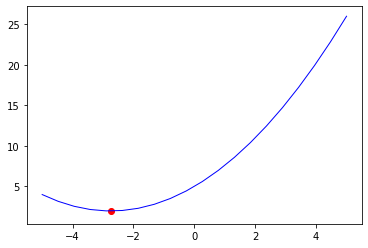

In [49]:
fig = plt.figure()
plt.plot(t, y, 'b', lw=1)
plt.scatter(t_ans, y_ans, c='r')
plt.show()